<a href="https://colab.research.google.com/github/paladikrithika/bollywood-music-recommender/blob/main/Music_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle -q

In [ ]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
kaggle_config = json.load(open("kaggle.json"))

In [ ]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [ ]:
!kaggle datasets download -d adityktkr/bollywood-lyrics-labelled


Dataset URL: https://www.kaggle.com/datasets/adityktkr/bollywood-lyrics-labelled
License(s): unknown
bollywood-lyrics-labelled.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

bollywood-lyrics-labelled.zip  kaggle.json  lyrics.json   metaData.json
combined.csv		       lyrics.csv   metaData.csv  sample_data


In [ ]:
with zipfile.ZipFile('bollywood-lyrics-labelled.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
df = pd.read_csv("/content/combined.csv", encoding='latin1')

In [ ]:
df.head()

,SongID,Song Name,Lyricists_1,Lyricists_2,Lyricists_3,Lyricists_4,Lyricists_5,Lyricists_6,Music_Director_1,Music_Director_2,...,Casts_14,Year,Lyrics,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,16,Meetha Sa,Virag Mishra,NaN,NaN,NaN,NaN,NaN,Bappa Lahiri,NaN,...,NaN,2010.0,\n\n--Male--\nAaaaa Aaaaa\n--Female--\nAaaaaa\...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,Dil Kashi,Virag Mishra,NaN,NaN,NaN,NaN,NaN,Bappa Lahiri,NaN,...,NaN,2010.0,\n\n--Male1--\nAnkhiyon Hi Ankhiyon Mein\nRati...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,Chal Halke Halke,Virag Mishra,NaN,NaN,NaN,NaN,NaN,Bappa Lahiri,NaN,...,NaN,2010.0,"\n\n--Male1--\nAray Peeli Chotiyaan,\nHawaeyn ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,Pyar Itna Na Kar,Virag Mishra,NaN,NaN,NaN,NaN,NaN,Bappa Lahiri,NaN,...,NaN,2010.0,\n\nPyar Itna Na Kar\nYeh Dil Jaata Hai Bhar\n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,Zaraa Maara Maara Sa,-,NaN,NaN,NaN,NaN,NaN,Tutul,Hanif Sheikh,...,NaN,2010.0,Zaraa Maara Maara Sa\nJaane Kyun Dil Ye Ban Ba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SongID            1291 non-null   int64  
 1   Song Name         1289 non-null   object 
 2   Lyricists_1       1289 non-null   object 
 3   Lyricists_2       113 non-null    object 
 4   Lyricists_3       31 non-null     object 
 5   Lyricists_4       22 non-null     object 
 6   Lyricists_5       16 non-null     object 
 7   Lyricists_6       11 non-null     object 
 8   Music_Director_1  1289 non-null   object 
 9   Music_Director_2  120 non-null    object 
 10  Music_Director_3  33 non-null     object 
 11  Singer_1          1289 non-null   object 
 12  Singer_2          572 non-null    object 
 13  Singer_3          150 non-null    object 
 14  Singer_4          47 non-null     object 
 15  Singer_5          17 non-null     object 
 16  Singer_6          6 non-null      object 


In [ ]:
df.isnull().sum()

,0
SongID,0
Song Name,2
Lyricists_1,2
Lyricists_2,1178
Lyricists_3,1260
Lyricists_4,1269
Lyricists_5,1275
Lyricists_6,1280
Music_Director_1,2
Music_Director_2,1171


In [ ]:
print(df.columns)

Index(['SongID', 'Song Name', 'Lyricists_1', 'Lyricists_2', 'Lyricists_3',
       'Lyricists_4', 'Lyricists_5', 'Lyricists_6', 'Music_Director_1',
       'Music_Director_2', 'Music_Director_3', 'Singer_1', 'Singer_2',
       'Singer_3', 'Singer_4', 'Singer_5', 'Singer_6', 'Singer_7', 'Cast_1',
       'Casts_2', 'Casts_3', 'Casts_4', 'Casts_5', 'Casts_6', 'Casts_7',
       'Casts_8', 'Casts_9', 'Casts_10', 'Casts_11', 'Casts_12', 'Casts_13',
       'Casts_14', 'Year', 'Lyrics', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40'],
      dtype='object')


In [ ]:
singer_cols = [col for col in df.columns if col.startswith("Singer_")]
top_singers = pd.Series(df[singer_cols].values.ravel()).dropna().value_counts().head(10)
print("\nTop 10 Singers:\n", top_singers)


Top 10 Singers:
 Shreya Ghoshal          74
Sunidhi Chauhan         66
Mohit Chauhan           53
Sonu Nigam              52
Mika Singh              47
Vishal Dadlani          36
Sukhwinder Singh        33
Arijit Singh            30
Shaan                   29
Rahat Fateh Ali Khan    29
Name: count, dtype: int64


In [ ]:
md_cols = [col for col in df.columns if col.startswith("Music_Director_")]
top_md = pd.Series(df[md_cols].values.ravel()).dropna().value_counts().head(10)
print("\nTop 10 Music Directors:\n", top_md)



Top 10 Music Directors:
 Pritam                116
Amit Trivedi           72
Pritam Chakraborty     66
Sajid-Wajid            65
Himesh Reshammiya      56
-                      46
Vishal-Shekhar         40
Adnan Sami             21
A R Rahman             20
Jeet Ganguly           18
Name: count, dtype: int64


In [ ]:
lyricist_cols = [col for col in df.columns if col.startswith("Lyricists_")]
top_lyricists = pd.Series(df[lyricist_cols].values.ravel()).dropna().value_counts().head(10)
print("\nTop 10 Lyricists:\n", top_lyricists)



Top 10 Lyricists:
 Irshad Kamil            110
Amitabh Bhattacharya    101
Kumaar                   94
-                        89
Shabbir Ahmed            67
Javed Akhtar             60
Swanand Kirkire          42
Sameer Anjaan            37
Gulzar                   34
Mayur Puri               32
Name: count, dtype: int64


In [ ]:
cast_cols = [col for col in df.columns if col.startswith("Cast_") or col.startswith("Casts_")]
top_cast = pd.Series(df[cast_cols].values.ravel()).dropna().value_counts().head(10)
print("\nTop 10 Cast Members:\n", top_cast)



Top 10 Cast Members:
 -                   303
Sonakshi Sinha       70
Anupam Kher          67
Akshay Kumar         63
Ranbir Kapoor        63
Sanjay Dutt          53
Emraan Hashmi        51
Boman Irani          47
Bipasha Basu         47
Deepika Padukone     46
Name: count, dtype: int64


In [ ]:
# Drop garbage columns like Unnamed: 34, 35, ...
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Drop rows with missing lyrics
df = df.dropna(subset=['Lyrics'])

# Drop duplicate songs (by song name)
df = df.drop_duplicates(subset=['Song Name'])

# Reset index
df = df.reset_index(drop=True)


In [ ]:
df.head()

,SongID,Song Name,Lyricists_1,Lyricists_2,Lyricists_3,Lyricists_4,Lyricists_5,Lyricists_6,Music_Director_1,Music_Director_2,...,Casts_7,Casts_8,Casts_9,Casts_10,Casts_11,Casts_12,Casts_13,Casts_14,Year,Lyrics
0,16,Meetha Sa,Virag Mishra,NaN,NaN,NaN,NaN,NaN,Bappa Lahiri,NaN,...,Saurabh Dubey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,\n\n--Male--\nAaaaa Aaaaa\n--Female--\nAaaaaa\...
1,17,Dil Kashi,Virag Mishra,NaN,NaN,NaN,NaN,NaN,Bappa Lahiri,NaN,...,Saurabh Dubey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,\n\n--Male1--\nAnkhiyon Hi Ankhiyon Mein\nRati...
2,18,Chal Halke Halke,Virag Mishra,NaN,NaN,NaN,NaN,NaN,Bappa Lahiri,NaN,...,Saurabh Dubey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,"\n\n--Male1--\nAray Peeli Chotiyaan,\nHawaeyn ..."
3,19,Pyar Itna Na Kar,Virag Mishra,NaN,NaN,NaN,NaN,NaN,Bappa Lahiri,NaN,...,Saurabh Dubey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,\n\nPyar Itna Na Kar\nYeh Dil Jaata Hai Bhar\n...
4,20,Zaraa Maara Maara Sa,-,NaN,NaN,NaN,NaN,NaN,Tutul,Hanif Sheikh,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,Zaraa Maara Maara Sa\nJaane Kyun Dil Ye Ban Ba...


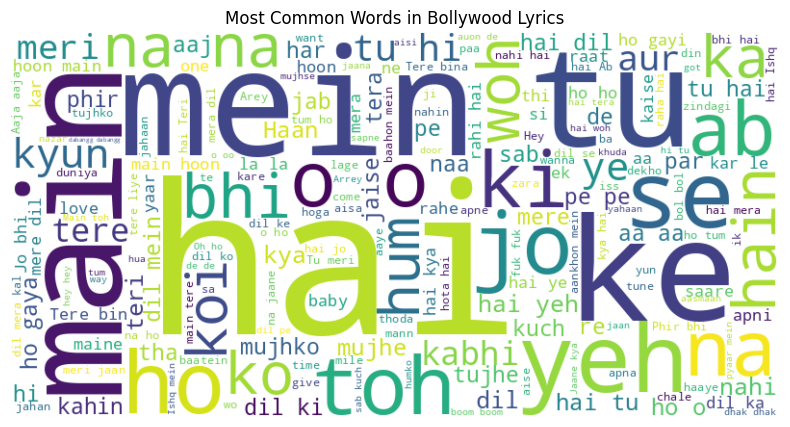

In [ ]:
# Combine all lyrics into one string
all_lyrics = " ".join(df['Lyrics'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Bollywood Lyrics")
plt.show()


In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(Lyrics):
    # Remove special characters and numbers
    Lyrics = re.sub(r"[^a-zA-Z\s]", "", Lyrics)
    # Convert to lowercase
    Lyrics = Lyrics.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(Lyrics)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [ ]:
df['cleaned_Lyrics'] = df['Lyrics'].apply(preprocess_text)

In [ ]:
df.head()

,SongID,Song Name,Lyricists_1,Lyricists_2,Lyricists_3,Lyricists_4,Lyricists_5,Lyricists_6,Music_Director_1,Music_Director_2,...,Casts_8,Casts_9,Casts_10,Casts_11,Casts_12,Casts_13,Casts_14,Year,Lyrics,cleaned_Lyrics
0,16,Meetha Sa,Virag Mishra,NaN,NaN,NaN,NaN,NaN,Bappa Lahiri,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,\n\n--Male--\nAaaaa Aaaaa\n--Female--\nAaaaaa\...,male aaaaa aaaaa female aaaaaa aaaaaa male mee...
1,17,Dil Kashi,Virag Mishra,NaN,NaN,NaN,NaN,NaN,Bappa Lahiri,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,\n\n--Male1--\nAnkhiyon Hi Ankhiyon Mein\nRati...,male ankhiyon hi ankhiyon mein ratiyaan yeh ka...
2,18,Chal Halke Halke,Virag Mishra,NaN,NaN,NaN,NaN,NaN,Bappa Lahiri,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,"\n\n--Male1--\nAray Peeli Chotiyaan,\nHawaeyn ...",male aray peeli chotiyaan hawaeyn sehen si maa...
3,19,Pyar Itna Na Kar,Virag Mishra,NaN,NaN,NaN,NaN,NaN,Bappa Lahiri,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,\n\nPyar Itna Na Kar\nYeh Dil Jaata Hai Bhar\n...,pyar itna na kar yeh dil jaata hai bhar u na h...
4,20,Zaraa Maara Maara Sa,-,NaN,NaN,NaN,NaN,NaN,Tutul,Hanif Sheikh,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,Zaraa Maara Maara Sa\nJaane Kyun Dil Ye Ban Ba...,zaraa maara maara sa jaane kyun dil ye ban ban...


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_Lyrics'])

# Check the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (1268, 5000)


In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
from difflib import get_close_matches

def recommend(song_name, top_n=5):
    df['Song Name'] = df['Song Name'].fillna("").astype(str)  # 🔧 Fix here

    matches = get_close_matches(song_name, df['Song Name'], n=1, cutoff=0.6)
    if not matches:
        return None, []

    matched_song = matches[0]
    idx = df[df['Song Name'] == matched_song].index[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    song_indices = [i[0] for i in sim_scores]

    results = df.iloc[song_indices][['Song Name', 'Lyrics']]
    return matched_song, results


In [ ]:
df["Song Name"][2]

'Chal Halke Halke'

In [ ]:
print("\nRecommendations for the song 'Chal Halke Halke':")
recommendations = recommend_songs("Chal Halke Halke") # df["song"][2]
print(recommendations)


Recommendations for the song 'Chal Halke Halke':
               Song Name        Singer_1
0  London Paris New York       Ali Zafar
1              Meetha Sa    Kailash Kher
2              Dil Kashi      Sonu Nigam
3           I Am In Love             K K
4  Sun Raha Hai (Female)  Shreya Ghoshal


In [ ]:
df.to_csv("bollywood_cleaned.csv", index=False)

In [ ]:
from google.colab import files
files.download("bollywood_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>